# DonorsChoose

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:

How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible
How to increase the consistency of project vetting across different volunteers to improve the experience for teachers
How to focus volunteer time on the applications that need the most assistance
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [ ]:
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [ ]:
project_data['id'].shape

(109248,)

In [ ]:
project_data.shape

(109248, 17)

In [ ]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [ ]:
resource_data.shape

(1541272, 4)

In [ ]:
resource_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


# Percentage of Project approved

In [ ]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [ ]:
project_is_approved=project_data['project_is_approved'][project_data['project_is_approved']==1].count()
project_not_approved=project_data['project_is_approved'][project_data['project_is_approved']==0].count()
total_project=project_data['project_is_approved'].count()
percentage_project_is_approved=(project_is_approved/total_project)*100
percentage_project_not_approved=(project_not_approved/total_project)*100

In [ ]:
percentage_project_is_approved,percentage_project_not_approved

(84.85830404217927, 15.141695957820739)

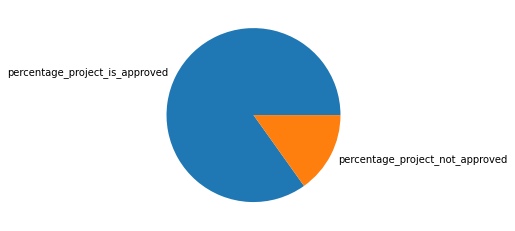

In [ ]:
y = np.array([percentage_project_is_approved,percentage_project_not_approved])
mylabels = ["percentage_project_is_approved", "percentage_project_not_approved"]

plt.pie(y, labels = mylabels)
plt.show() 

# Project accepted per school state

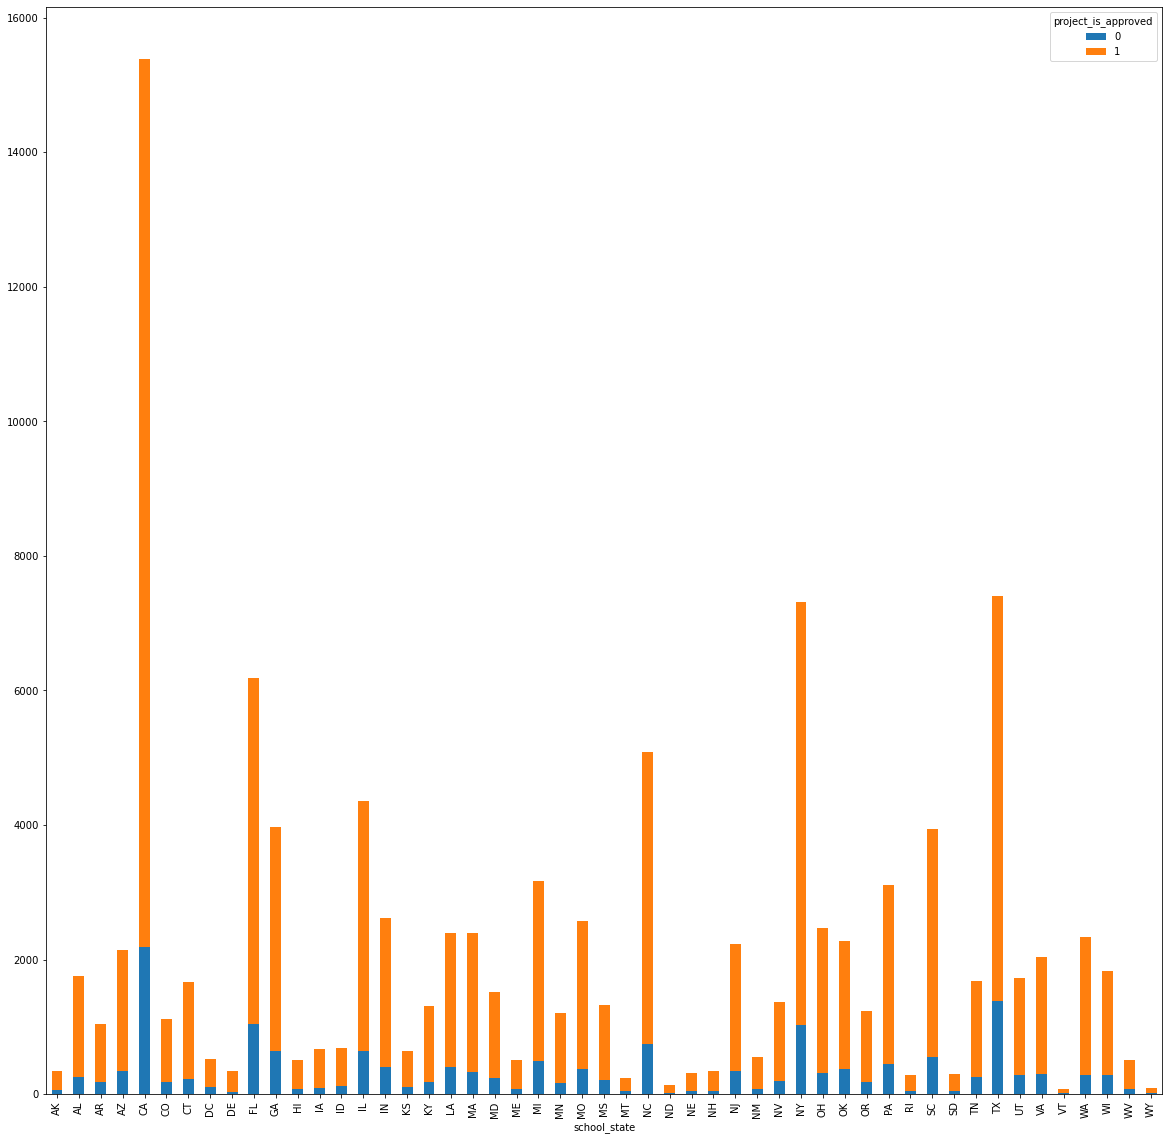

In [ ]:
project_data.groupby(['school_state','project_is_approved'])['project_is_approved'].count().unstack().plot(kind='bar',stacked=True,figsize=(20, 20))
plt.show()

In [ ]:
project_data.groupby(['school_state','project_is_approved'])['project_is_approved'].count().unstack()

project_is_approved,0,1
school_state,,
AK,55,290
AL,256,1506
AR,177,872
AZ,347,1800
CA,2183,13205
CO,176,935
CT,218,1445
DC,102,414
DE,35,308


# Project accepted as per teacher_prefix

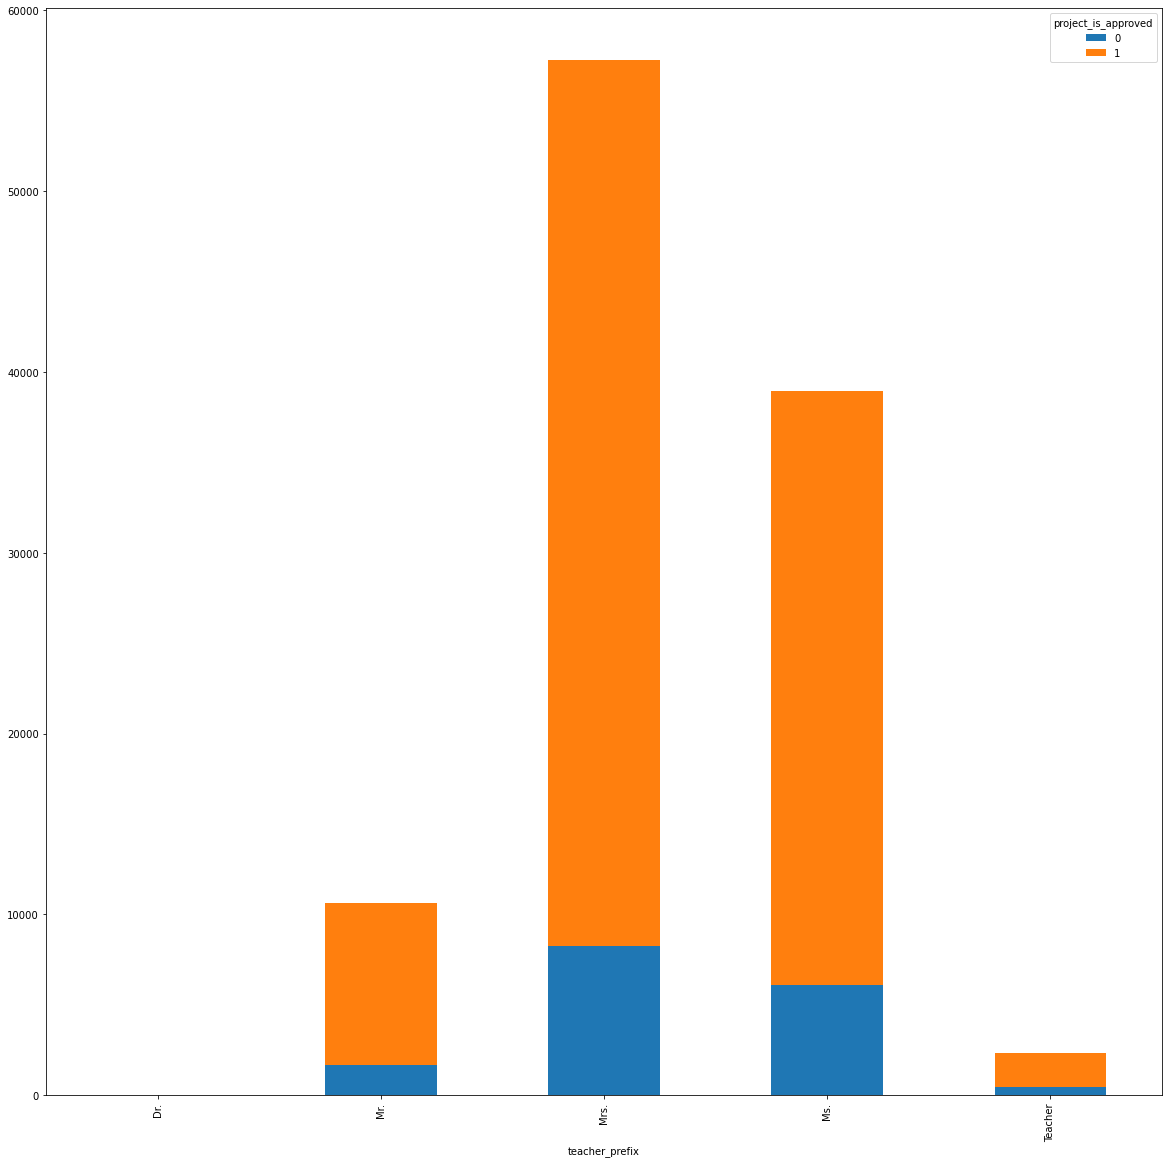

In [ ]:
project_approved=project_data.groupby(['teacher_prefix','project_is_approved'])['project_is_approved'].count().unstack().plot(kind='bar',stacked=True,figsize=(20, 20))
plt.show()

# Project accepted as per project_grade_category

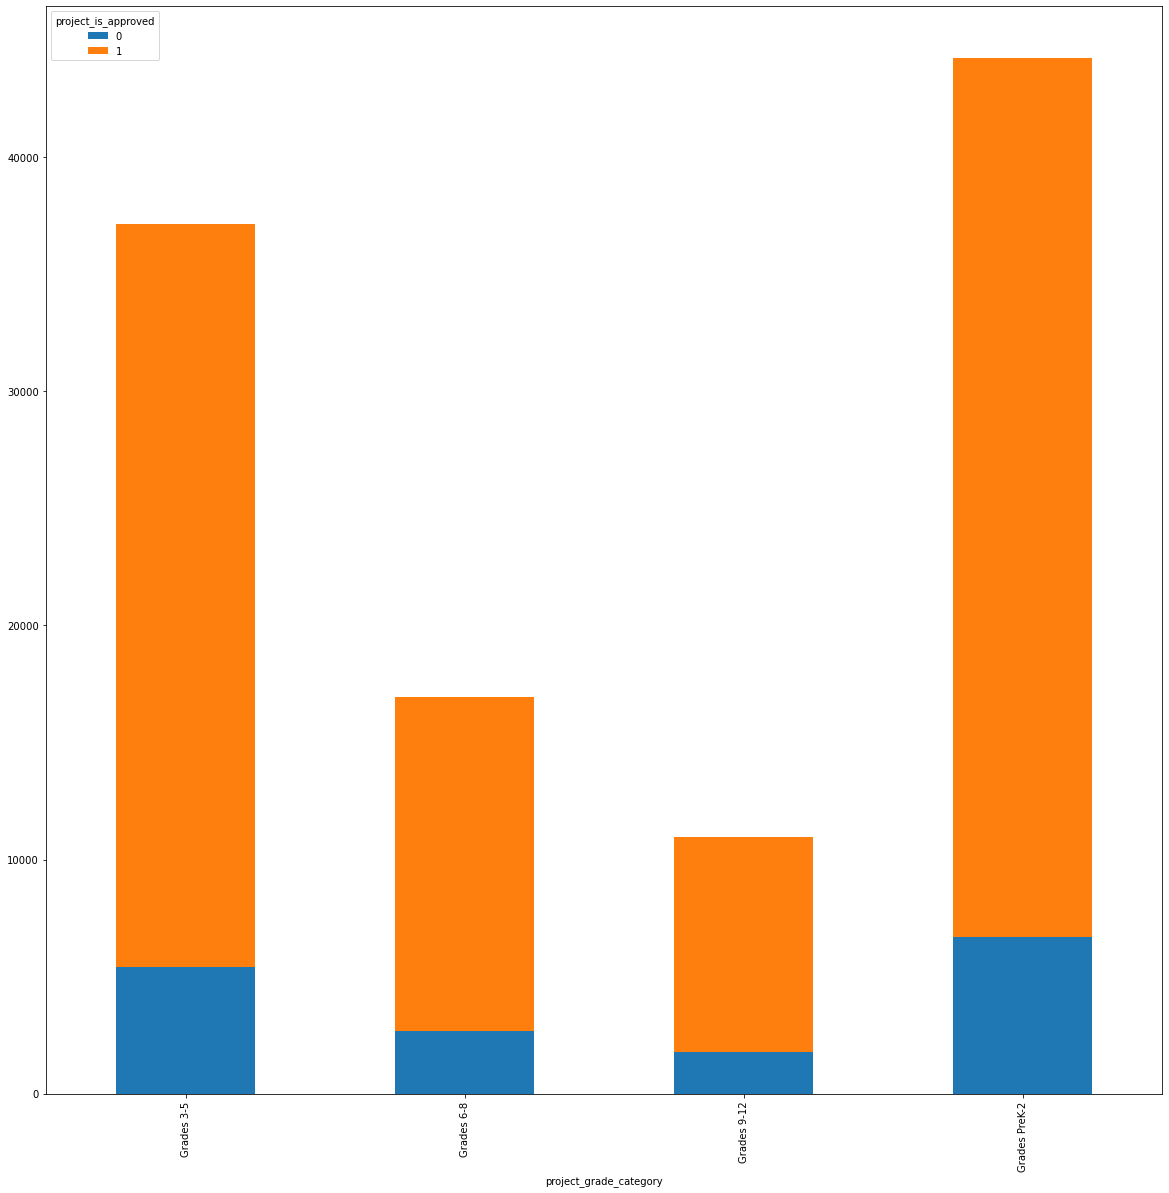

In [ ]:
project_approved=project_data.groupby(['project_grade_category','project_is_approved'])['project_is_approved'].count().unstack().plot(kind='bar',stacked=True,figsize=(20, 20))
plt.show()

# Clean  project_subject_categories

In [ ]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
cat_list = []
for i in catogories:
    temp = ""
   
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','')
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_')
    cat_list.append(temp.strip())

In [ ]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


# Project accepted as per clean_categories

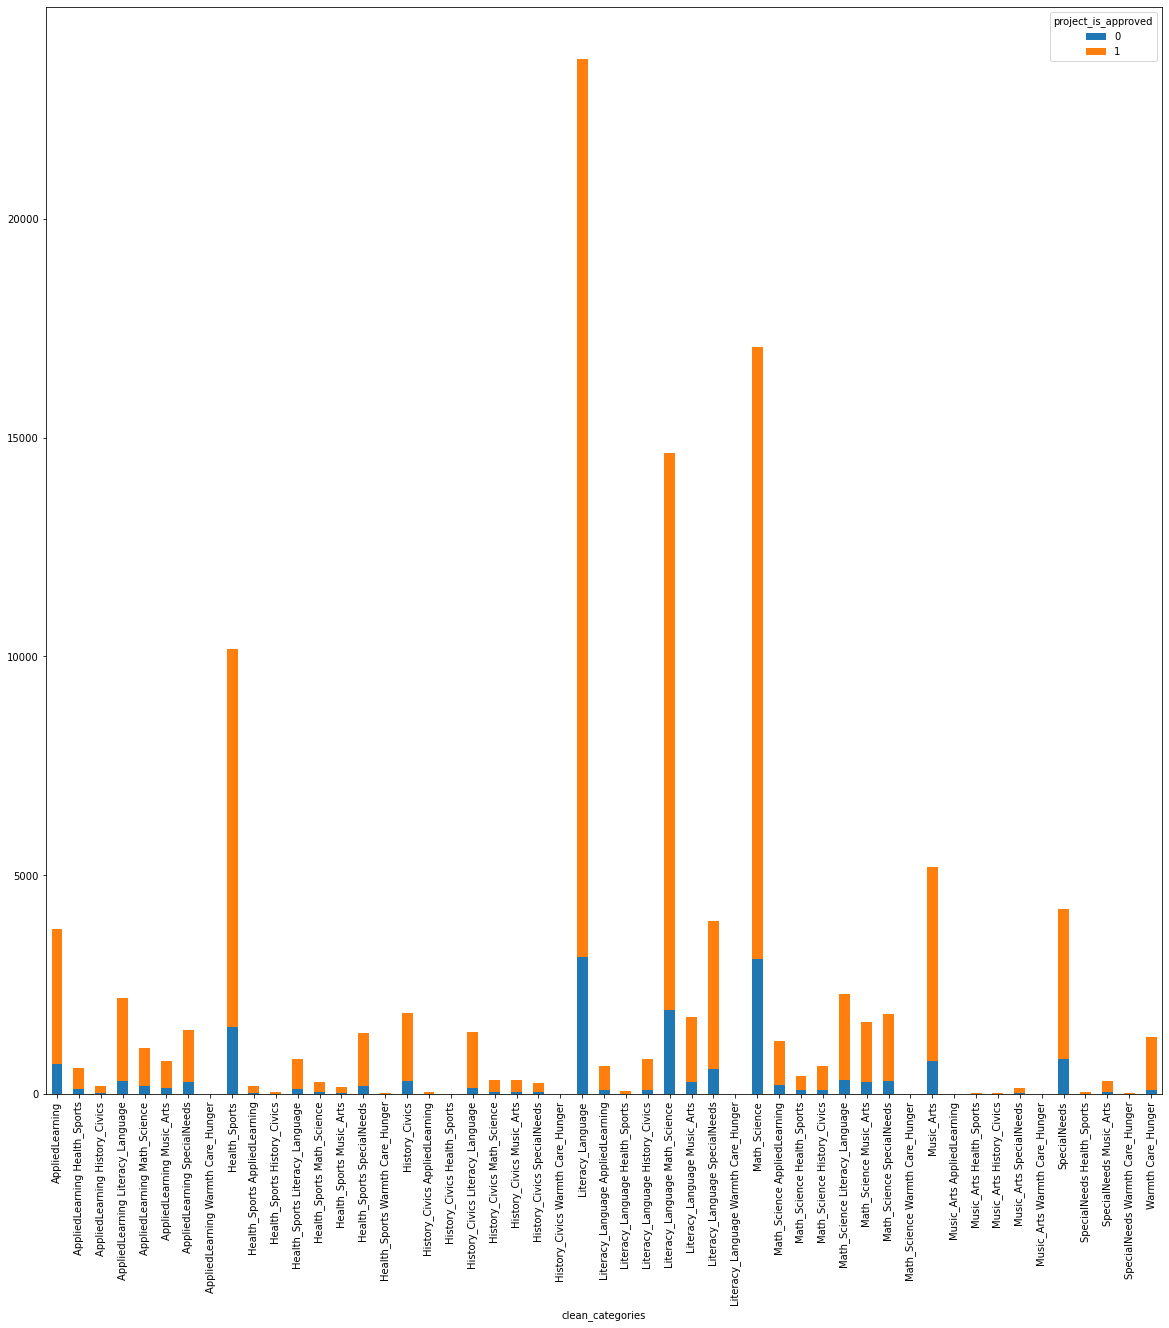

In [ ]:
project_approved=project_data.groupby(['clean_categories','project_is_approved'])['project_is_approved'].count().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True,figsize=(20, 20))
plt.show()

In [ ]:
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
print(my_counter)

Counter({'Literacy_Language': 52239, 'Math_Science': 41421, 'Health_Sports': 14223, 'SpecialNeeds': 13642, 'AppliedLearning': 12135, 'Music_Arts': 10293, 'History_Civics': 5914, 'Warmth': 1388, 'Care_Hunger': 1388})


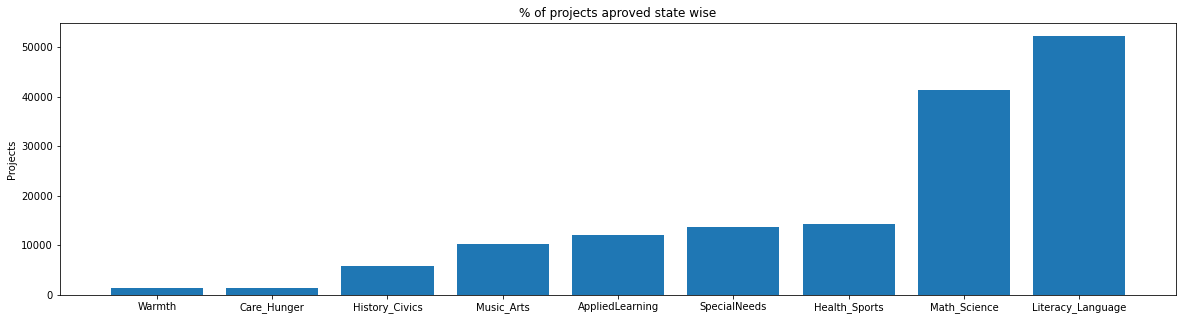

In [ ]:
my_counter_sort = sorted(my_counter,key=my_counter.get)
my_counter_sort_dict=dict()

for i in my_counter_sort:
    my_counter_sort_dict[i] = my_counter[i]

i = np.arange(len(my_counter_sort_dict))

plt.figure(figsize=(20,5))
p1 = plt.bar(i,list(my_counter_sort_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(i,list(my_counter_sort_dict.keys()))
plt.show()

# Clean project_subject_subcategories

In [ ]:
catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
sub_cat_list = []
for i in catogories:
    temp = ""
   
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','')
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [ ]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,Civics_Government TeamSports


# Project accepted as per clean_subcategories¶

In [ ]:
#project_data.groupby(['clean_subcategories','project_is_approved'])['project_is_approved'].agg('count')
temp = pd.DataFrame(project_data.groupby('clean_subcategories')['project_is_approved'].agg(lambda x: x.eq(1).sum())).reset_index()
temp.head()

,clean_subcategories,project_is_approved
0,AppliedSciences,2038
1,AppliedSciences CharacterEducation,44
2,AppliedSciences Civics_Government,12
3,AppliedSciences College_CareerPrep,330
4,AppliedSciences CommunityService,15


In [ ]:
project_data.groupby(['clean_subcategories','project_is_approved'])['project_is_approved'].count()

clean_subcategories                 project_is_approved
AppliedSciences                     0                       454
                                    1                      2038
AppliedSciences CharacterEducation  0                         9
                                    1                        44
AppliedSciences Civics_Government   0                         2
                                                           ... 
VisualArts                          1                      1827
VisualArts Warmth Care_Hunger       0                         1
                                    1                         1
Warmth Care_Hunger                  0                        97
                                    1                      1212
Name: project_is_approved, Length: 745, dtype: int64

In [ ]:
from collections import Counter
my_counter_sub = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter_sub.update(word.split())
print(my_counter_sub)

Counter({'Literacy': 33700, 'Mathematics': 28074, 'Literature_Writing': 22179, 'SpecialNeeds': 13642, 'AppliedSciences': 10816, 'Health_Wellness': 10234, 'VisualArts': 6278, 'EnvironmentalScience': 5591, 'Gym_Fitness': 4509, 'ESL': 4367, 'EarlyDevelopment': 4254, 'Health_LifeScience': 4235, 'History_Geography': 3171, 'Music': 3145, 'College_CareerPrep': 2568, 'Other': 2372, 'TeamSports': 2192, 'CharacterEducation': 2065, 'PerformingArts': 1961, 'SocialSciences': 1920, 'Warmth': 1388, 'Care_Hunger': 1388, 'NutritionEducation': 1355, 'ForeignLanguages': 890, 'Civics_Government': 815, 'Extracurricular': 810, 'ParentInvolvement': 677, 'FinancialLiteracy': 568, 'CommunityService': 441, 'Economics': 269})


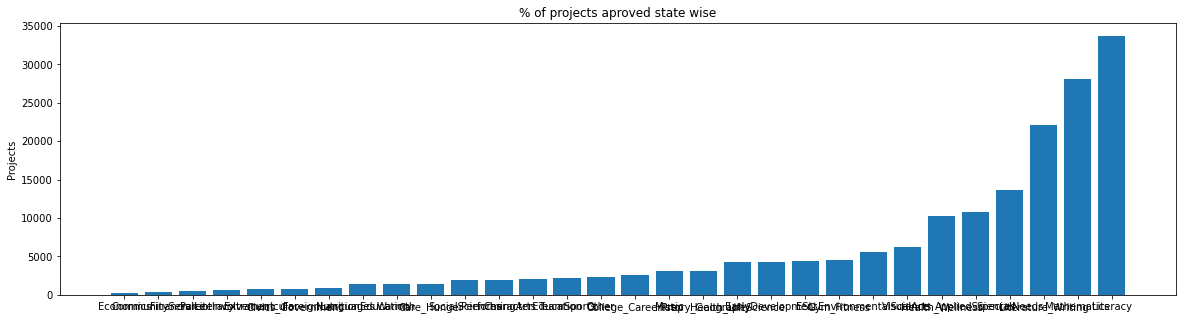

In [ ]:
my_counter_sub_sort = sorted(my_counter_sub,key=my_counter_sub.get)
my_counter_sub_sort_dict=dict()

for i in my_counter_sub_sort:
    my_counter_sub_sort_dict[i] = my_counter_sub[i]

i = np.arange(len(my_counter_sub_sort_dict))

plt.figure(figsize=(20,5))
p1 = plt.bar(i,list(my_counter_sub_sort_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(i,list(my_counter_sub_sort_dict.keys()))
plt.show()

# Project accepted as per project_title

In [ ]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

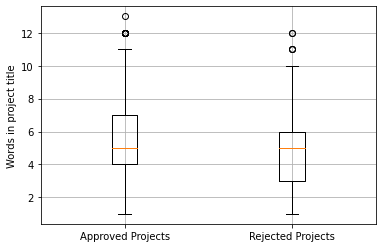

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

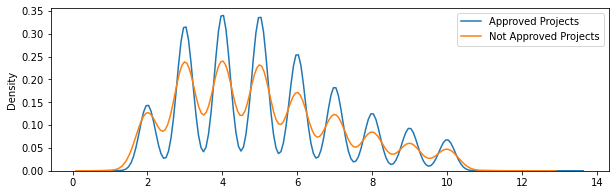

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

# Project accepted as per project_essay

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

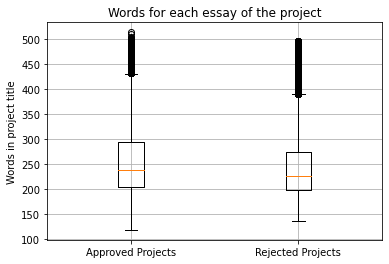

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

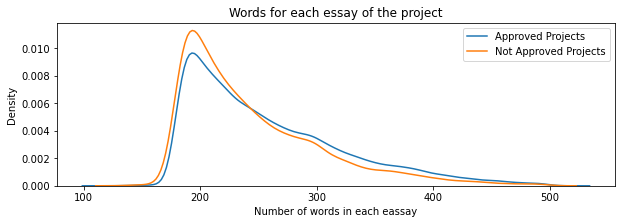

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

# Cost per project

In [ ]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [ ]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

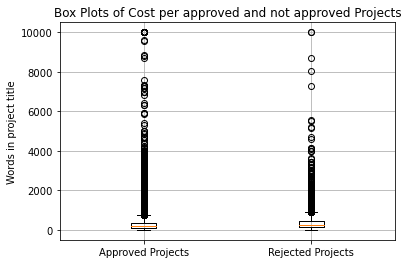

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

# Project accepted as per teacher_number_of_previously_posted_projects

In [ ]:
project_data.groupby(['teacher_number_of_previously_posted_projects','project_is_approved'])['project_is_approved'].count().unstack()

project_is_approved,0,1
teacher_number_of_previously_posted_projects,,
0,5362.0,24652.0
1,2729.0,13329.0
2,1645.0,8705.0
3,1113.0,5997.0
4,814.0,4452.0
...,...,...
428,NaN,1.0
432,NaN,1.0
433,NaN,1.0


In [ ]:
approved_project = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_project = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

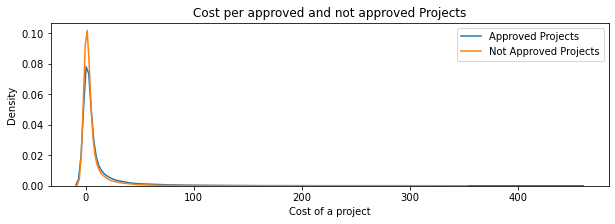

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_project, hist=False, label="Approved Projects")
sns.distplot(rejected_project, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()